## CHURN PREDICTION PROJECT

<a href='#Load-data' style="font-size: 18px; text-decoration: none; margin-left: 30px;">1. Load data</a><br>

<a href='#Visualization' style="font-size: 18px; text-decoration: none; margin-left: 30px;">2. Visualization </a><br>

<a href='#Variables-reduction' style="font-size: 18px; text-decoration: none; margin-left: 30px;">3. Variables reduction</a><br>

<a href='#Model-deveplopment' style="font-size: 18px; text-decoration: none; margin-left: 30px;">4. Model deveplopment</a><br>

<a href='#XGBOOST-Classifier' style="font-size: 15px; text-decoration: none; margin-left: 50px;">4.1. XGBOOST-Classifier</a><br>
<a href='#Logistic-Regression' style="font-size: 15px; text-decoration: none; margin-left: 50px;">4.2. Logistic Regression</a><br>
<a href='#Neural-Network---Multi-layer-Perceptron-Classifier' style="font-size: 15px; text-decoration: none; margin-left: 50px;">4.3. NN Multi-layer Perceptron Classifier</a><br>
<a href='#Support-Vector-Classification' style="font-size: 15px; text-decoration: none; margin-left: 50px;">4.4. Support Vector Classification</a><br>
<a href='#Random-Forest-Classifier' style="font-size: 15px; text-decoration: none; margin-left: 50px;">4.5. Random Forest Classifier</a><br>

<a href='#Conclusion' style="font-size: 18px; text-decoration: none; margin-left: 30px;">5. Conclusion</a><br>


Our dataset is Telco Customer Churn.

We are going to try to make the best predictive model for reducing customer churn by identifying potential churn candidates beforehand, and take proactive actions to make them stay.

Dataset contains this columns with data:
><b>1. CustomerID</b>
    - Customer ID
><b>2. Gender</b>
    - Whether the customer is a male or a female
><b>3. SeniorCitizen</b>
    - Whether the customer is a senior citizen or not (Yes, No)
><b>4. Partner</b>
    - Whether the customer has a partner or not (Yes, No)
><b>5. Dependents</b>
    - Whether the customer has dependents or not (Yes, No)
><b>6. Tenure</b>
    - Number of months the customer has stayed with the company
><b>7. PhoneService</b>
    - Whether the customer has a phone service or not (Yes, No)
><b>8. MultipleLines</b>
    - Whether the customer has multiple lines or not (Yes, No, No phone service)
><b>9. InternetService</b>
    - Customer’s internet service provider (DSL, Fiber optic, No)
><b>10. OnlineSecurity</b>
    - Whether the customer has online security or not (Yes, No, No internet service)
><b>11. OnlineBackup</b>
    - Whether the customer has online backup or not (Yes, No, No internet service)
><b>12. DeviceProtection</b>
    - Whether the customer has device protection or not (Yes, No, No internet service)
><b>13. TechSupport</b>
    - Whether the customer has tech support or not (Yes, No, No internet service)
><b>14. StreamingTV</b>
    - Whether the customer has streaming TV or not (Yes, No, No internet service)
><b>15. StreamingMovies</b>
    - Whether the customer has streaming movies or not (Yes, No, No internet service)
><b>16. Contract</b>
    - The contract term of the customer (Month-to-month, One year, Two year)
><b>17. PaperlessBilling</b>
    - Whether the customer has paperless billing or not (Yes, No)
><b>18. PaymentMethod</b>
    - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
><b>19. MonthlyCharges</b>
    - The amount charged to the customer monthly
><b>20. TotalCharges</b>
    - The total amount charged to the customer
><b>21. Churn</b>
    - Whether the customer churned or not (Yes or No) -> our target variable

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

## Load data

In [2]:
data=pd.read_csv("Telco-Customer-Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Dealing with blank cells
data.replace(" ", np.nan, inplace=True)

In [6]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data[['TotalCharges']]=data[["TotalCharges"]].astype(float)

In [8]:
data["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
# Filling Nan-s
data["TotalCharges"]=data["TotalCharges"].fillna(data["TotalCharges"].mean())

In [10]:
data["TotalCharges"].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
data.isnull().values.sum()

0

In [12]:
data["SeniorCitizen"]=data["SeniorCitizen"].replace({0:'No', 1:'Yes'})

In [13]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Visualization

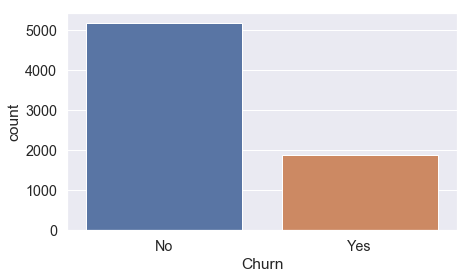

In [14]:
plt.figure(figsize=(7,4))
sns.set(font_scale=1.3)
sns.countplot(data["Churn"]);


In [15]:
print(data["Churn"].value_counts())
print(data["Churn"].value_counts()/data["Churn"].value_counts().sum()*100)

No     5174
Yes    1869
Name: Churn, dtype: int64
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


### Categorical variables - relation with target variable ("Churn")

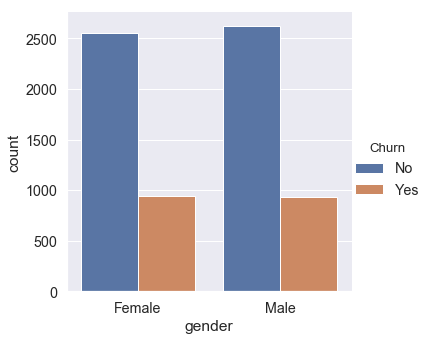

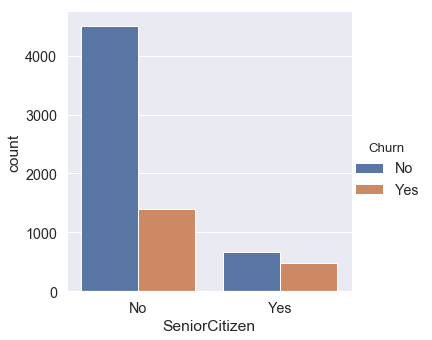

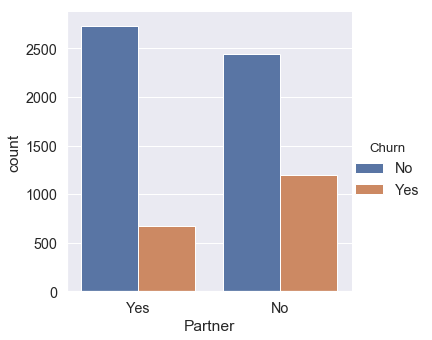

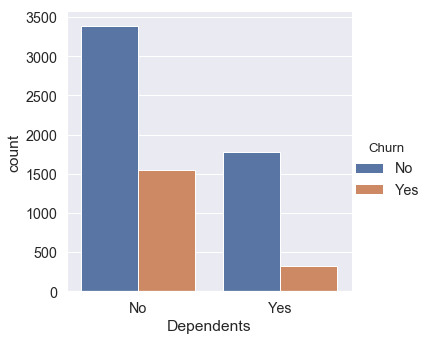

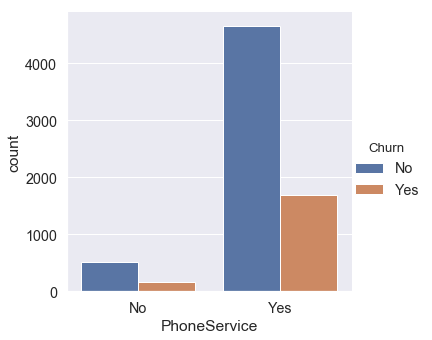

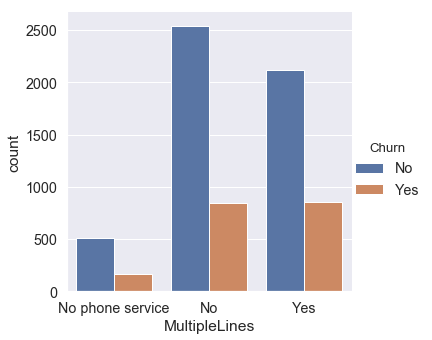

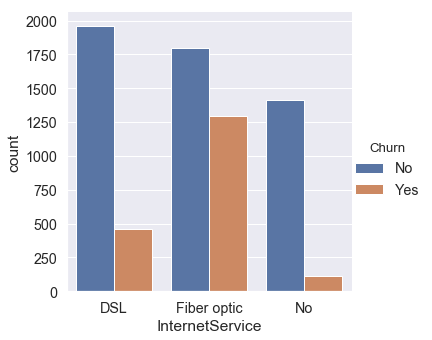

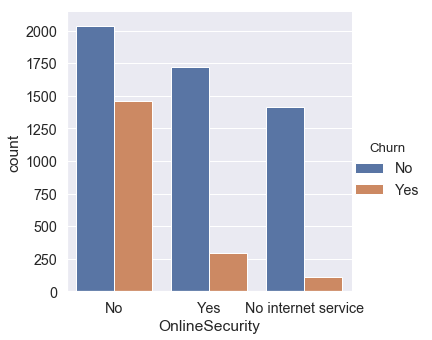

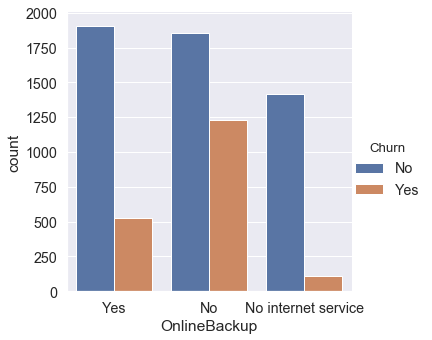

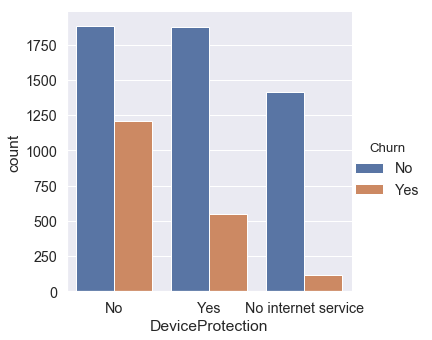

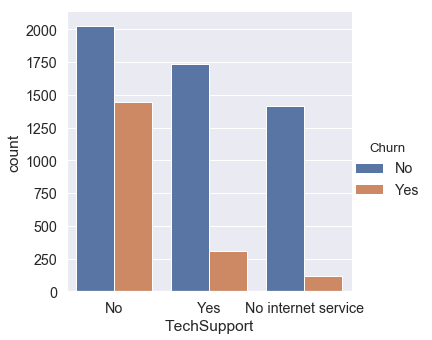

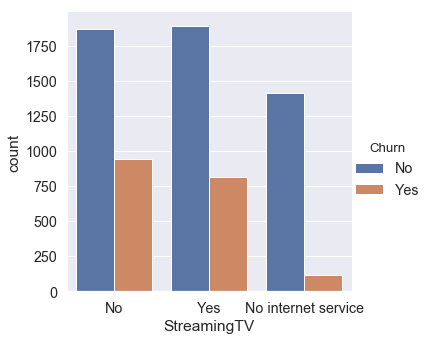

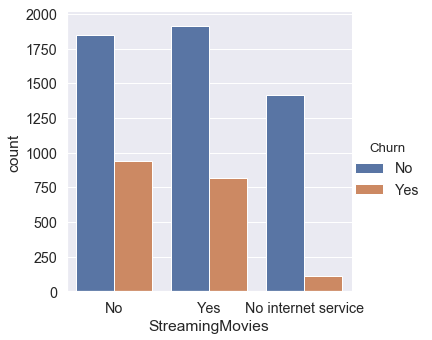

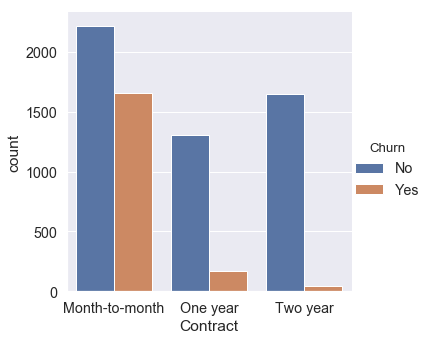

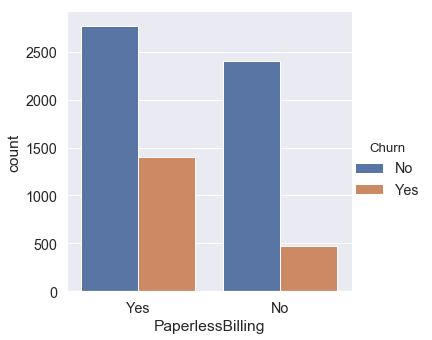

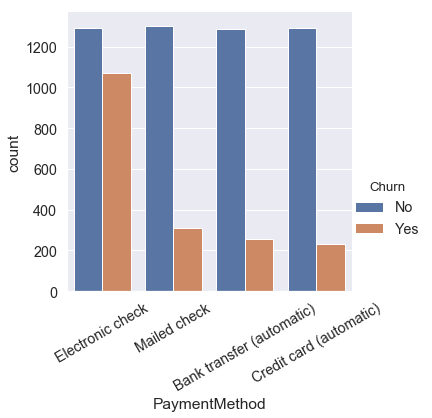

In [16]:
# Seaborn categorical plots
sns.catplot(x=("gender"), kind="count", hue="Churn", data=data)
sns.catplot(x=("SeniorCitizen"), kind="count", hue="Churn", data=data)
sns.catplot(x=("Partner"), kind="count", hue="Churn", data=data)
sns.catplot(x=("Dependents"), kind="count", hue="Churn", data=data)
sns.catplot(x=("PhoneService"), kind="count", hue="Churn", data=data)
sns.catplot(x=("MultipleLines"), kind="count", hue="Churn", data=data)
sns.catplot(x=("InternetService"), kind="count", hue="Churn", data=data)
sns.catplot(x=("OnlineSecurity"), kind="count", hue="Churn", data=data)
sns.catplot(x=("OnlineBackup"), kind="count", hue="Churn", data=data)
sns.catplot(x=("DeviceProtection"), kind="count", hue="Churn", data=data)
sns.catplot(x=("TechSupport"), kind="count", hue="Churn", data=data)
sns.catplot(x=("StreamingTV"), kind="count", hue="Churn", data=data)
sns.catplot(x=("StreamingMovies"), kind="count", hue="Churn", data=data)
sns.catplot(x=("Contract"), kind="count", hue="Churn", data=data)
sns.catplot(x=("PaperlessBilling"), kind="count", hue="Churn", data=data)
p=sns.catplot(x=("PaymentMethod"), kind="count", hue="Churn", data=data)
p.set_xticklabels(rotation=30);

### Continous variables - relation with target variable ("Churn")

C:\Users\X\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


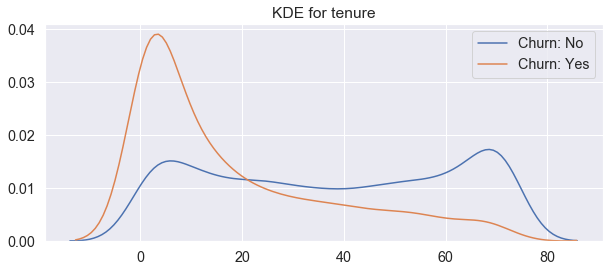

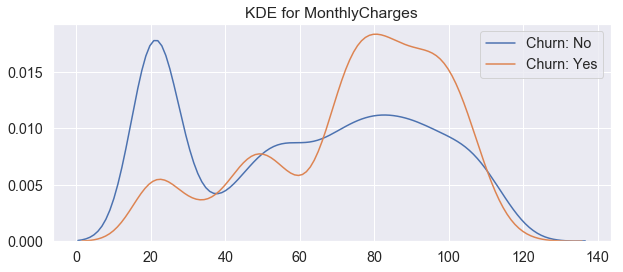

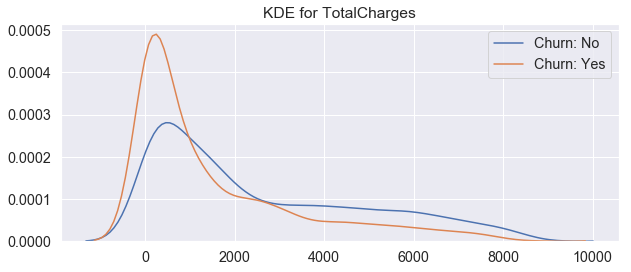

In [17]:
# Seaborn kernel density estimation plots (KDE)
def kdeplot(feature):
    plt.figure(figsize=(10, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature], label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature], label= 'Churn: Yes')

kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

In [18]:
s = (data.dtypes == 'object')
object_columns = list(s[s].index)

print("Categorical variables:")
print(object_columns)

Categorical variables:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Performing Label Encoder on categorical variables

In [19]:
from sklearn.preprocessing import LabelEncoder

data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
      'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]=data[['customerID',
      'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
      'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']].apply(LabelEncoder().fit_transform)

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
# data=pd.read_csv("Telco_Churn_NullFree_LabelEncoder.csv")

## Variables reduction

#### Weight of Evidence and Information Value

<b>Weight of Evidence (WOE)</b> tells the predictive power of independent variables in relation to the dependent variable (target variable).

<b>Information Value (IV)</b> is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

In [22]:
max_bin = 20 # 20 bins so that each category (bin) will have 5% of observations
force_bin = 3 # to avoid produce of only one category while binning

# Define a binning function for continuous independent variables
def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

# Define a binning function for categorical independent variables
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [23]:
# here we define independent variables in relation to the dependent variable (target=Churn)
def data_vars(df1, Churn):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(Churn, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(Churn, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [24]:
final_iv, IV = data_vars(data,data.Churn)

In [25]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,customerID,0.0,3521.0,3522,974,0.276547,2548,0.723453,0.521134,0.492462,0.056590,0.003290
1,customerID,3522.0,7042.0,3521,895,0.254189,2626,0.745811,0.478866,0.507538,-0.058151,0.003290
2,gender,0.0,0.0,3488,939,0.269209,2549,0.730791,0.502408,0.492656,0.019602,0.000380
3,gender,1.0,1.0,3555,930,0.261603,2625,0.738397,0.497592,0.507344,-0.019409,0.000380
4,SeniorCitizen,0.0,0.0,5901,1393,0.236062,4508,0.763938,0.745318,0.871279,-0.156151,0.105621


#### Information Value interpretation:
 - 0.1 or less  -> weak/useless predictor
 - 0.1 to 0.3   -> medium predictor 
 - 0.3 to 0.5   -> strong predictor
 - 0.5 or above -> suspicious or too good to be true

In [26]:
IV.sort_values("IV",ascending=False)

,VAR_NAME,IV
19,tenure,0.859452
0,Contract,0.841179
3,InternetService,0.375183
16,TotalCharges,0.315902
8,PaperlessBilling,0.203068
4,MonthlyCharges,0.173429
7,OnlineSecurity,0.171977
15,TechSupport,0.157456
1,Dependents,0.155488
9,Partner,0.118729


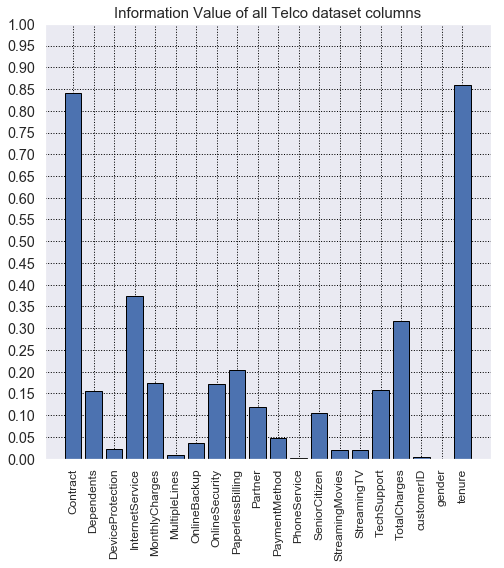

In [27]:
plt.figure(figsize=(8,8))
plt.bar(IV["VAR_NAME"],IV["IV"],edgecolor='black')
ytx=np.arange(0.0,1.05,0.05)
plt.yticks(ytx)
plt.xticks(fontsize=12,rotation='vertical')
plt.grid(linestyle=":",color="black");
plt.title("Information Value of all Telco dataset columns", fontsize=15);

In [28]:
# Choosing best predictive variables
best_predict_v = IV[(IV['IV'] >= 0.1) & (IV['IV'] <= 0.5)].sort_values('IV',ascending=False)
best_predict_v

,VAR_NAME,IV
3,InternetService,0.375183
16,TotalCharges,0.315902
8,PaperlessBilling,0.203068
4,MonthlyCharges,0.173429
7,OnlineSecurity,0.171977
15,TechSupport,0.157456
1,Dependents,0.155488
9,Partner,0.118729
12,SeniorCitizen,0.105621


In [29]:
best_predict_v["VAR_NAME"].values

array(['InternetService', 'TotalCharges', 'PaperlessBilling',
       'MonthlyCharges', 'OnlineSecurity', 'TechSupport', 'Dependents',
       'Partner', 'SeniorCitizen'], dtype=object)

In [30]:
# Creating new dataset
dataFM=data[['InternetService', 'TotalCharges', 'PaperlessBilling',
       'MonthlyCharges', 'OnlineSecurity', 'TechSupport', 'Dependents',
       'Partner', 'SeniorCitizen', 'Churn']]

In [31]:
dataFM.head()

,InternetService,TotalCharges,PaperlessBilling,MonthlyCharges,OnlineSecurity,TechSupport,Dependents,Partner,SeniorCitizen,Churn
0,0,29.85,1,29.85,0,0,0,1,0,0
1,0,1889.50,0,56.95,2,0,0,0,0,0
2,0,108.15,1,53.85,2,0,0,0,0,1
3,0,1840.75,0,42.30,2,2,0,0,0,0
4,1,151.65,1,70.70,0,0,0,0,0,1


In [32]:
dataFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
InternetService     7043 non-null int32
TotalCharges        7043 non-null float64
PaperlessBilling    7043 non-null int32
MonthlyCharges      7043 non-null float64
OnlineSecurity      7043 non-null int32
TechSupport         7043 non-null int32
Dependents          7043 non-null int32
Partner             7043 non-null int32
SeniorCitizen       7043 non-null int32
Churn               7043 non-null int32
dtypes: float64(2), int32(8)
memory usage: 330.2 KB


#### Correlation 

 - a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other
 - when two features have high correlation, we can drop one of the two features
 - we can say that high correlation is from 0.9 and above

In [33]:
dataFM.corr()

,InternetService,TotalCharges,PaperlessBilling,MonthlyCharges,OnlineSecurity,TechSupport,Dependents,Partner,SeniorCitizen,Churn
InternetService,1.000000,-0.175429,-0.138625,-0.323260,-0.028416,-0.026047,0.044590,0.000891,-0.032310,-0.047291
TotalCharges,-0.175429,1.000000,0.157676,0.650468,0.254308,0.276713,0.064535,0.318812,0.102395,-0.199428
PaperlessBilling,-0.138625,0.157676,1.000000,0.352150,-0.157641,-0.113600,-0.111377,-0.014877,0.156530,0.191825
MonthlyCharges,-0.323260,0.650468,0.352150,1.000000,-0.053878,-0.008682,-0.113890,0.096848,0.220173,0.193356
OnlineSecurity,-0.028416,0.254308,-0.157641,-0.053878,1.000000,0.285028,0.152166,0.150828,-0.128221,-0.289309
TechSupport,-0.026047,0.276713,-0.113600,-0.008682,0.285028,1.000000,0.133524,0.126733,-0.151268,-0.282492
Dependents,0.044590,0.064535,-0.111377,-0.113890,0.152166,0.133524,1.000000,0.452676,-0.211185,-0.164221
Partner,0.000891,0.318812,-0.014877,0.096848,0.150828,0.126733,0.452676,1.000000,0.016479,-0.150448
SeniorCitizen,-0.032310,0.102395,0.156530,0.220173,-0.128221,-0.151268,-0.211185,0.016479,1.000000,0.150889
Churn,-0.047291,-0.199428,0.191825,0.193356,-0.289309,-0.282492,-0.164221,-0.150448,0.150889,1.000000


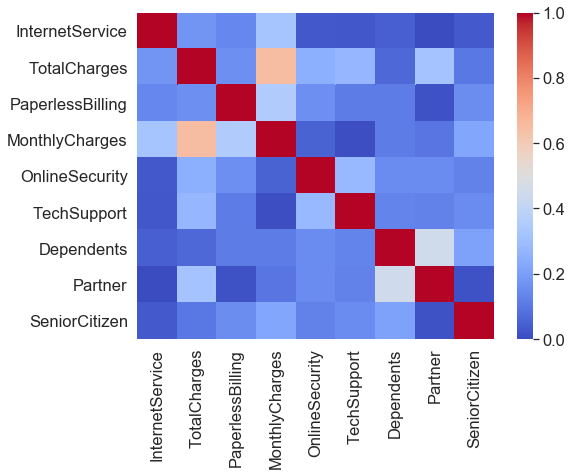

In [34]:
#Seaborn heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.heatmap(dataFM.drop("Churn", axis=1).corr().abs(),cmap="coolwarm");

In [35]:
# Simple way to see values of correlation beetween variables
Correlation_Values=dataFM.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
Correlation_Values

Churn             Churn               1.000000
TotalCharges      MonthlyCharges      0.650468
Partner           Dependents          0.452676
PaperlessBilling  MonthlyCharges      0.352150
InternetService   MonthlyCharges      0.323260
TotalCharges      Partner             0.318812
Churn             OnlineSecurity      0.289309
OnlineSecurity    TechSupport         0.285028
TechSupport       Churn               0.282492
TotalCharges      TechSupport         0.276713
                  OnlineSecurity      0.254308
MonthlyCharges    SeniorCitizen       0.220173
SeniorCitizen     Dependents          0.211185
TotalCharges      Churn               0.199428
MonthlyCharges    Churn               0.193356
PaperlessBilling  Churn               0.191825
InternetService   TotalCharges        0.175429
Dependents        Churn               0.164221
PaperlessBilling  TotalCharges        0.157676
OnlineSecurity    PaperlessBilling    0.157641
PaperlessBilling  SeniorCitizen       0.156530
Dependents   

## Model development

In [36]:
from sklearn.model_selection import train_test_split

# Read the data
data = dataFM

# Separate target from predictors
y = data.Churn
X = data.drop(['Churn'], axis=1)

# Divide data into training and test subsets in ratio 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [37]:
# Pipelines are a simple way to keep our data preprocessing and modeling code organized
# It deals with missing values, lable encoder and model training evaluation in one like of code
# But since we did Nan-s and label encoder, we will do model training evaulation

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

modelXGBC = XGBClassifier(n_estimators=500)
modelMLPC = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
modelRFC = RandomForestClassifier(n_estimators=100, random_state=0)
modelSVC = SVC()
modelLogReg = LogisticRegression()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline1 = Pipeline(steps=[('model', modelXGBC)])
my_pipeline2 = Pipeline(steps=[('model', modelMLPC)])
my_pipeline3 = Pipeline(steps=[('model', modelRFC)])
my_pipeline4 = Pipeline(steps=[('model', modelSVC)])
my_pipeline5 = Pipeline(steps=[('model', modelLogReg)])

# Preprocessing of training data, fit model 
my_pipeline1.fit(X_train, y_train)
my_pipeline2.fit(X_train, y_train)
my_pipeline3.fit(X_train, y_train)
my_pipeline4.fit(X_train, y_train)
my_pipeline5.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds1 = my_pipeline1.predict(X_test)
preds2 = my_pipeline2.predict(X_test)
preds3 = my_pipeline3.predict(X_test)
preds4 = my_pipeline4.predict(X_test)
preds5 = my_pipeline5.predict(X_test)

# Evaluate the model
score1 = mean_absolute_error(y_test, preds1)
score2 = mean_absolute_error(y_test, preds2)
score3 = mean_absolute_error(y_test, preds3)
score4 = mean_absolute_error(y_test, preds4)
score5 = mean_absolute_error(y_test, preds5)

print("Mean Absolute Error for XGBClassifier:",score1)
print("Mean Absolute Error for Multi-layer Perceptron Classifier:",score2)
print("Mean Absolute Error for Random Forest Classifier:",score3)
print("Mean Absolute Error for Support Vector Classification:",score4)
print("Mean Absolute Error for Logistic Regression:",score5)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Mean Absolute Error for XGBClassifier: 0.20156139105748758
Mean Absolute Error for Multi-layer Perceptron Classifier: 0.22285308729595457
Mean Absolute Error for Random Forest Classifier: 0.2207239176721079
Mean Absolute Error for Support Vector Classification: 0.23420865862313697
Mean Absolute Error for Logistic Regression: 0.20511000709723207


#### Mean Absolute Error (MAE):
- MAE is one of the most common metrics has been used to calculate error. It measures performance of models which are applied on continuous variables. So for calculating MAE, firstly we should know what is the meaning of error here. Error is prediction error of model:
                                 PredictionError = ActualError - PredictedValue
- MAE is calculated for each row of data, then take the absolute value of them and finally compute the mean of all absolute prediction errors.
- as more MAE is closer to zero(0) the better evaluation it does

In [38]:
# Cross-validation will give better measures of model performance
# It devides dataset into "folds" (cv) and runs evaluation on that devided "folds"
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scoresCV1 = -1 * cross_val_score(my_pipeline1, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV2 = -1 * cross_val_score(my_pipeline2, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV3 = -1 * cross_val_score(my_pipeline3, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV4 = -1 * cross_val_score(my_pipeline4, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV5 = -1 * cross_val_score(my_pipeline5, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')


print("Average Mean Absolute Error score (across experiments) for XGBClassifier:", scoresCV1.mean())
print("Average Mean Absolute Error score (across experiments) for (Neural Net) Multi-layer Perceptron Classifier:",score2)
print("Average Mean Absolute Error score (across experiments) for Random Forest Classifier:", scoresCV3.mean())
print("Average Mean Absolute Error score (across experiments) for Support Vector Classification:", scoresCV4.mean())
print("Average Mean Absolute Error score (across experiments) for Logistic Regression:", scoresCV5.mean())

C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default 

Average Mean Absolute Error score (across experiments) for XGBClassifier: 0.2037474595994982
Average Mean Absolute Error score (across experiments) for (Neural Net) Multi-layer Perceptron Classifier: 0.22285308729595457
Average Mean Absolute Error score (across experiments) for Random Forest Classifier: 0.22788208405402774
Average Mean Absolute Error score (across experiments) for Support Vector Classification: 0.2331392817923966
Average Mean Absolute Error score (across experiments) for Logistic Regression: 0.20829089874565124


C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
X_train

,InternetService,TotalCharges,PaperlessBilling,MonthlyCharges,OnlineSecurity,TechSupport,Dependents,Partner,SeniorCitizen
2920,0,6155.40,0,85.10,2,2,0,1,0
2966,0,672.70,1,46.35,0,0,0,0,1
6099,2,1810.55,0,24.70,1,1,1,1,0
5482,0,2405.05,1,73.90,0,2,1,1,0
2012,1,4533.70,1,98.75,2,0,0,1,0
156,1,1821.95,1,84.15,0,0,0,0,0
6562,1,1369.80,1,100.20,0,0,0,1,1
1495,1,4993.40,0,98.15,2,0,1,1,0
939,2,320.45,0,19.90,1,1,0,0,0
3631,0,49.55,1,49.55,2,0,0,1,1


In [40]:
# Standard scaler is used to remove outliers from dataset
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train[["TotalCharges","MonthlyCharges"]]=sc.fit_transform(X_train[["TotalCharges","MonthlyCharges"]])
X_test[["TotalCharges","MonthlyCharges"]]=sc.transform(X_test[["TotalCharges","MonthlyCharges"]])

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\X\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2920 to 2732
Data columns (total 9 columns):
InternetService     5634 non-null int32
TotalCharges        5634 non-null float64
PaperlessBilling    5634 non-null int32
MonthlyCharges      5634 non-null float64
OnlineSecurity      5634 non-null int32
TechSupport         5634 non-null int32
Dependents          5634 non-null int32
Partner             5634 non-null int32
SeniorCitizen       5634 non-null int32
dtypes: float64(2), int32(7)
memory usage: 286.1 KB


In [42]:
X_train.head()

,InternetService,TotalCharges,PaperlessBilling,MonthlyCharges,OnlineSecurity,TechSupport,Dependents,Partner,SeniorCitizen
2920,0,1.704560,0,0.674154,2,2,0,1,0
2966,0,-0.711711,1,-0.614894,0,0,0,0,1
6099,2,-0.210251,0,-1.335097,1,1,1,1,0
5482,0,0.051750,1,0.301578,0,2,1,1,0
2012,1,0.989863,1,1.128231,2,0,0,1,0


C:\Users\X\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


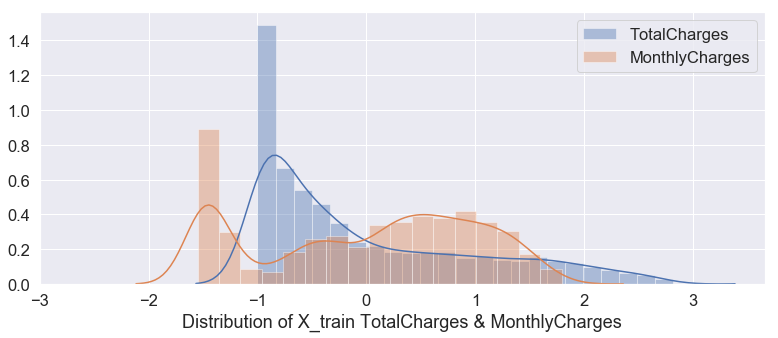

In [43]:
# Seaborn distribution plot
# No outliers here: nothing above 3rd interquartile range
plt.figure(figsize=(13,5))
sns.distplot(X_train["TotalCharges"])
sns.distplot(X_train["MonthlyCharges"])
xtx=np.arange(-3,4,1)
plt.xticks(xtx)
plt.xlabel(xlabel="Distribution of X_train TotalCharges & MonthlyCharges")
plt.legend(X_train[["TotalCharges","MonthlyCharges"]]);


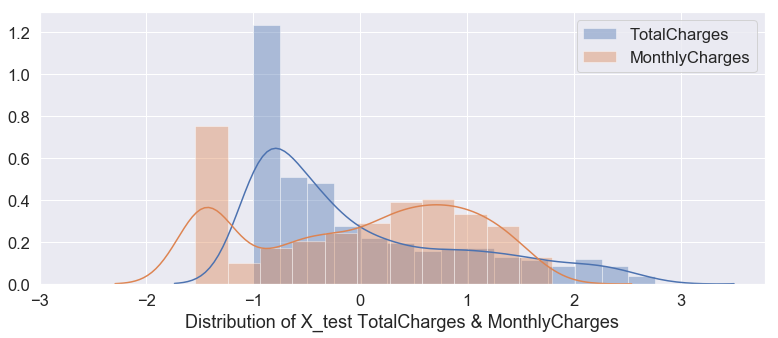

In [44]:
# No outliers here also
plt.figure(figsize=(13,5))
sns.distplot(X_test["TotalCharges"])
sns.distplot(X_test["MonthlyCharges"])
xtx=np.arange(-3,4,1)
plt.xticks(xtx)
plt.xlabel(xlabel="Distribution of X_test TotalCharges & MonthlyCharges")
plt.legend(X_test[["TotalCharges","MonthlyCharges"]]);

## XGBOOST Classifier

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve,auc

XGBC = XGBClassifier(n_estimators=500)
XGBC.fit(X_train, y_train)
pred_XGBC = XGBC.predict(X_test)

In [46]:
print(classification_report(y_test, pred_XGBC))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_XGBC))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[933 108]
 [176 192]]


#### Confusion Matrix terminology:
- **True Positives (TP)**: correct prediction of someone who is not churner - `933`
- **True Negatives (TN)**: correct prediction of someone who is churner - `192`
- **False Positives (FP)**: incorrect prediction of someone who is not churner - `108`
- **False Negatives (FN)**: incorrect prediction of someone who is churner - `176` 


In [47]:
XBGC_acc = accuracy_score(y_test,pred_XGBC)
XGBC_prec = precision_score(y_test,pred_XGBC)
XGBC_rec = recall_score(y_test,pred_XGBC)
XGBC_f1 = f1_score(y_test,pred_XGBC)

print("XGBClassifier have "'{:.2%}'.format(XBGC_acc),"accuracy!")
print("XGBClassifier have "'{:.2%}'.format(XGBC_prec),"precision!")
print("XGBClassifier have "'{:.2%}'.format(XGBC_rec),"recall score!")
print("XGBClassifier have "'{:.2%}'.format(XGBC_f1),"F1 score!")

XGBClassifier have 79.84% accuracy!
XGBClassifier have 64.00% precision!
XGBClassifier have 52.17% recall score!
XGBClassifier have 57.49% F1 score!


$ \Large \text{Accuracy} = \frac{Number-of-correct-predictions}{Total-number-of-predictions} $

$\Large \text{Precision} = \frac{TP}{TP + FP} $

$\Large \text{Recall} = \frac{TP}{TP + FN} $

$\Large \text{F1} = 2x\frac{Precision * Recall}{Precision + Recall} $

In [48]:
accuracy_CV_xgbc = cross_val_score(XGBC, X, y, scoring="accuracy", cv = 5)
print("XGBClassifier accuracy after Cross-Validation is "'{:.2%}'.format(accuracy_CV_xgbc.mean()))

XGBClassifier accuracy after Cross-Validation is 79.63%


In [49]:
# Target scores (predict), can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
# So, this works best when the pred_XGBC* is the probability of positive class, instead of hard prediction classes (pred_XGBC* without predict_proba)! *(or any other algorhitm)
pred_XGBC_roc = XGBC.fit(X_train, y_train).predict_proba(X_test)[:,1] 

false_positive_rate_XGBC, true_positive_rate_XGBC, thresholds_XGBC = roc_curve(y_test,pred_XGBC_roc)
roc_auc_XGBC = auc(false_positive_rate_XGBC, true_positive_rate_XGBC)

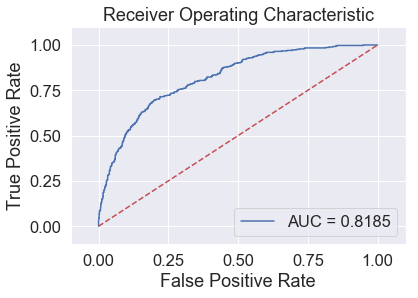

In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XGBC, true_positive_rate_XGBC, 'b', label='AUC = %0.4f'% roc_auc_XGBC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC - ROC curve 
- is a performance measurement for classification problem at various thresholds settings
- ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes
- Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s, that means, higher the AUC, better the model is at distinguishing between people who are churners and thoes who are not
- An excellent model has AUC near to the 1 which means it has good measure of separability
- A poor model has AUC near to the 0 which means it has worst measure of separability
- In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever!

## Logistic Regression

In [51]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
pred_LogReg = LogReg.predict(X_test)

print(classification_report(y_test, pred_LogReg))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_LogReg))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.48      0.55       368

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix:
 [[944  97]
 [191 177]]


C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
LogReg_acc = accuracy_score(y_test,pred_LogReg)
LogReg_prec = precision_score(y_test,pred_LogReg)
LogReg_rec = recall_score(y_test,pred_LogReg)
LogReg_f1 = f1_score(y_test,pred_LogReg)

print("Logistic Regression have "'{:.2%}'.format(LogReg_acc),"accuracy!")
print("Logistic Regression have "'{:.2%}'.format(LogReg_prec),"precision!")
print("Logistic Regression have "'{:.2%}'.format(LogReg_rec),"recall score!")
print("Logistic Regression have "'{:.2%}'.format(LogReg_f1),"F1 score!")

Logistic Regression have 79.56% accuracy!
Logistic Regression have 64.60% precision!
Logistic Regression have 48.10% recall score!
Logistic Regression have 55.14% F1 score!


In [53]:
accuracy_CV_logreg = cross_val_score(LogReg, X, y, scoring="accuracy", cv = 5)
print("Logistic Regression accuracy after Cross-Validation is "'{:.2%}'.format(accuracy_CV_logreg.mean()))

Logistic Regression accuracy after Cross-Validation is 79.17%


C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [54]:
pred_LogReg_roc =LogReg.fit(X_train, y_train).predict_proba(X_test)[:,1]


false_positive_rate_LogReg, true_positive_rate_LogReg, thresholds_LogReg = roc_curve(y_test,pred_LogReg_roc)
roc_auc_LogReg = auc(false_positive_rate_LogReg, true_positive_rate_LogReg)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


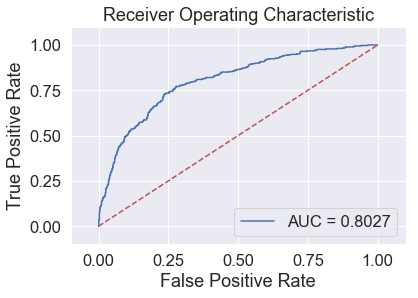

In [55]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_LogReg, true_positive_rate_LogReg, 'b', label='AUC = %0.4f'% roc_auc_LogReg)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Neural Network - Multi-layer Perceptron Classifier

In [56]:
MLPC = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
MLPC.fit(X_train, y_train)
pred_MLPC = MLPC.predict(X_test)

print(classification_report(y_test, pred_MLPC))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_MLPC))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.47      0.54       368

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[946  95]
 [195 173]]


In [57]:
MLPC_acc = accuracy_score(y_test,pred_MLPC)
MLPC_prec = precision_score(y_test,pred_MLPC)
MLPC_rec = recall_score(y_test,pred_MLPC)
MLPC_f1 = f1_score(y_test,pred_MLPC)

print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_acc),"accuracy!")
print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_prec),"precision!")
print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_rec),"recall score!")
print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_f1),"F1 score!")

(Neural Net) Multi-layer Perceptron Classifier have 79.42% accuracy!
(Neural Net) Multi-layer Perceptron Classifier have 64.55% precision!
(Neural Net) Multi-layer Perceptron Classifier have 47.01% recall score!
(Neural Net) Multi-layer Perceptron Classifier have 54.40% F1 score!


In [58]:
accuracy_CV_mlpc = cross_val_score(MLPC, X, y, scoring="accuracy", cv = 5)
print("(Neural Net) Multi-layer Perceptron Classifier accuracy after Cross-Validation is "'{:.2%}'.format(accuracy_CV_mlpc.mean()))

(Neural Net) Multi-layer Perceptron Classifier accuracy after Cross-Validation is 78.93%


In [59]:
pred_MLPC_roc =MLPC.fit(X_train, y_train).predict_proba(X_test)[:,1]

false_positive_rate_MLPC, true_positive_rate_MLPC, thresholds_MLPC = roc_curve(y_test,pred_MLPC_roc)
roc_auc_MLPC = auc(false_positive_rate_MLPC, true_positive_rate_MLPC)

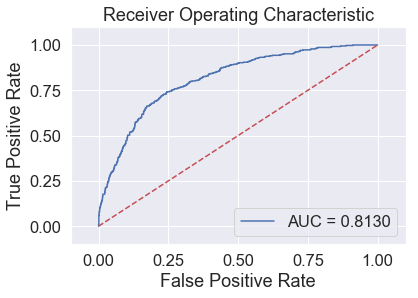

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_MLPC, true_positive_rate_MLPC, 'b', label='AUC = %0.4f'% roc_auc_MLPC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Classification

In [61]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_svc))

C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1041
           1       0.69      0.36      0.47       368

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.75      0.65      0.67      1409
weighted avg       0.77      0.79      0.77      1409

Confusion Matrix:
 [[980  61]
 [235 133]]


In [62]:
svc_acc = accuracy_score(y_test,pred_svc)
svc_prec = precision_score(y_test,pred_svc)
svc_rec = recall_score(y_test,pred_svc)
svc_f1 = f1_score(y_test,pred_svc)

print("Support Vector Classification have "'{:.2%}'.format(svc_acc),"accuracy!")
print("Support Vector Classification have "'{:.2%}'.format(svc_prec),"precision!")
print("Support Vector Classification have "'{:.2%}'.format(svc_rec),"recall score!")
print("Support Vector Classification have "'{:.2%}'.format(svc_f1),"F1 score!")

Support Vector Classification have 78.99% accuracy!
Support Vector Classification have 68.56% precision!
Support Vector Classification have 36.14% recall score!
Support Vector Classification have 47.33% F1 score!


In [63]:
accuracy_CV_svc = cross_val_score(svc, X, y, scoring="accuracy", cv = 5)
print("Support Vector Classification accuracy after Cross-Validation is "'{:.2%}'.format(accuracy_CV_svc.mean()))

C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default 

Support Vector Classification accuracy after Cross-Validation is 76.69%


In [64]:
pred_svc_roc =svc.fit(X_train, y_train).predict_proba(X_test)[:,1]

false_positive_rate_svc, true_positive_rate_svc, thresholds_svc = roc_curve(y_test,pred_svc_roc)
roc_auc_svc = auc(false_positive_rate_svc, true_positive_rate_svc)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


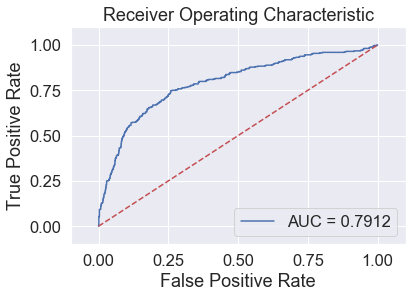

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_svc, true_positive_rate_svc, 'b', label='AUC = %0.4f'% roc_auc_svc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [66]:
RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

print(classification_report(y_test, pred_RFC))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.47      0.53       368

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
 [[923 118]
 [194 174]]


In [67]:
RFC_acc = accuracy_score(y_test,pred_RFC)
RFC_prec = precision_score(y_test,pred_RFC)
RFC_rec = recall_score(y_test,pred_RFC)
RFC_f1 = f1_score(y_test,pred_RFC)

print("Random Forest Classifier have "'{:.2%}'.format(RFC_acc),"accuracy!")
print("Random Forest Classifier have "'{:.2%}'.format(RFC_prec),"precision!")
print("Random Forest Classifier have "'{:.2%}'.format(RFC_rec),"recall score!")
print("Random Forest Classifier have "'{:.2%}'.format(RFC_f1),"F1 score!")

Random Forest Classifier have 77.86% accuracy!
Random Forest Classifier have 59.59% precision!
Random Forest Classifier have 47.28% recall score!
Random Forest Classifier have 52.73% F1 score!


In [68]:
accuracy_CV_rfc = cross_val_score(RFC, X, y, scoring="accuracy", cv = 5)
print("Random Forest Classifier accuracy after Cross-Validation is "'{:.2%}'.format(accuracy_CV_rfc.mean()))

Random Forest Classifier accuracy after Cross-Validation is 77.21%


In [69]:
pred_RFC_roc =RFC.fit(X_train, y_train).predict_proba(X_test)[:,1]

false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(y_test,pred_RFC_roc)
roc_auc_RFC = auc(false_positive_rate_RFC, true_positive_rate_RFC)

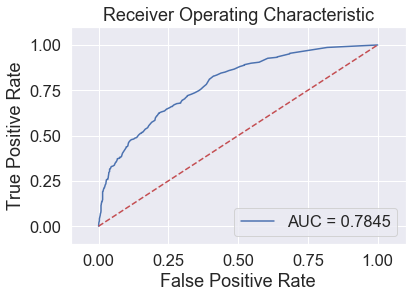

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_RFC, true_positive_rate_RFC, 'b', label='AUC = %0.4f'% roc_auc_RFC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### All ROC curves together

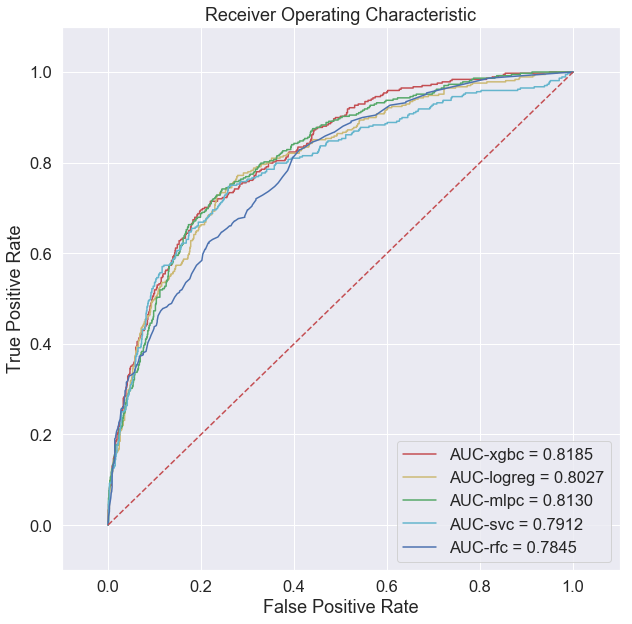

In [71]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XGBC, true_positive_rate_XGBC, 'r', label='AUC-xgbc = %0.4f'% roc_auc_XGBC)
plt.plot(false_positive_rate_LogReg, true_positive_rate_LogReg, 'y', label='AUC-logreg = %0.4f'% roc_auc_LogReg)
plt.plot(false_positive_rate_MLPC, true_positive_rate_MLPC, 'g', label='AUC-mlpc = %0.4f'% roc_auc_MLPC)
plt.plot(false_positive_rate_svc, true_positive_rate_svc, 'c', label='AUC-svc = %0.4f'% roc_auc_svc)
plt.plot(false_positive_rate_RFC, true_positive_rate_RFC, 'b', label='AUC-rfc = %0.4f'% roc_auc_RFC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion

As we can see, the results of performance of 5 different models are very similar.

For every model it is common the low score of predicion actual Churners (1), but the dataset is too small for better performance at that point and the ratio of Churners/Non-churners also makes the difference.

Regarding that, we have nice ROC with good ROC measures.

We can say that XGBooster Classifier has proven as the best model for current churn dataset.